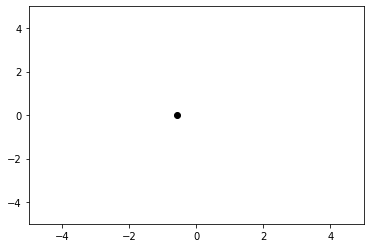

In [2]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

<IPython.core.display.Javascript object>


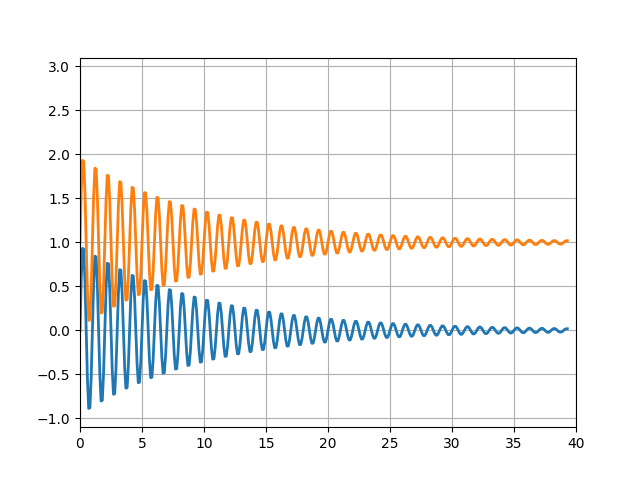

In [32]:
%matplotlib notebook

import itertools

import numpy as np
import matplotlib.pyplot as plt

def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        y = np.sin(2*np.pi*t) * np.exp(-t/10.)
        yield t, y, y + 1


def init():
    ax.set_ylim(-1.1, 3.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    del y2data[:]
    line.set_data(xdata, ydata)
    line2.set_data(xdata, y2data)
    return line, line2

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata, y2data = [], [], []


def run(data):
    # update the data
    t, y1, y2 = data
    xdata.append(t)
    ydata.append(y1)
    y2data.append(y2)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)
    line2.set_data(xdata, y2data)

    return line, line2

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, init_func=init)
plt.show()